<a href="https://colab.research.google.com/github/teteumac/ML_Alabama/blob/main/7_deep_computer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 14 – Deep Computer Vision Using Convolutional Neural Networks**

❗️ **This will be very slow, unless you are using a GPU**

❗️ **If you do not, then you should run this notebook in Colab, using a GPU runtime**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/07_deep_computer_vision_with_cnns.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

Due date: 2022-03-28

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"07_deep_computer_vision_with_cnns_Stallman_Torvalds.pdf".

Submission via blackboard (UA) or Google Form (see notion, LPC).

Feel free to answer free text questions in text cells using markdown and possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended for you to try to understand every line of code.   
Big blocks of code are usually meant to just be clicked through.**

In [1]:
group_name = ""
names = ["a", "b", "c"]

# Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")

import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

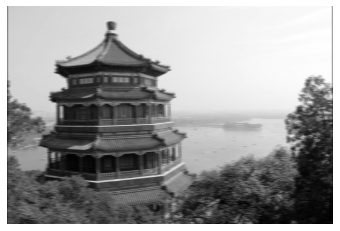

In [4]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

In [5]:
def crop(images):
    return images[150:220, 130:250]

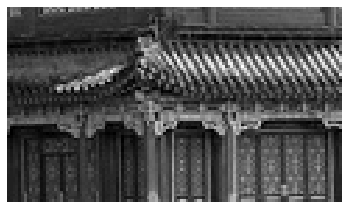

In [6]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

# Basics: Filters and Pooling

## Task 1: Filters

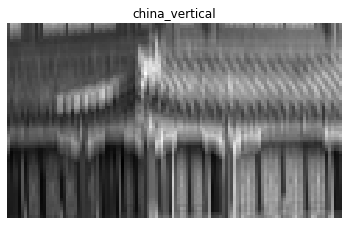

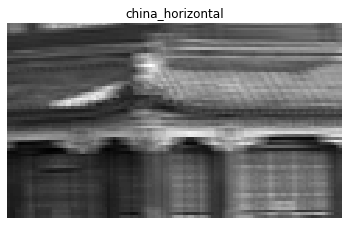

In [7]:
for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.title(filename)
    plt.show()

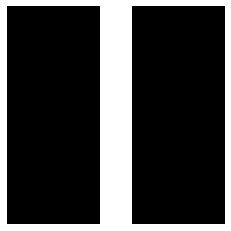

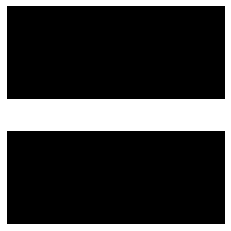

In [8]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

**Task 1 a)**: Describe how the filters work and what their purpose in a CNN is.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

**Task 1 a) answer:** The filters are a set of weights that "focus" in a given specific form in the image. In the example above, the neurons using the vertical filter ignore everything in their receptive field except for the central vertical line. Similar happens with horizontal filter. Thus, a layer full of neurons using the same filter outputs a feature map, which highlights the areas in an image that activate the filter the most. During training, the convolutional layer will automatically learn the most useful filters for its task, and the layers above will learn to combine them into more complex patterns.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Convolutional Layer in Keras

To create a 2D convulutional use `keras.layers.Conv2D()` (https://keras.io/api/layers/convolution_layers/convolution2d/), To create a 2D convulutional layer with 32 filters, kernel size of 3, 1 stride, padding=same and RELU activation. 

**Task 1 b)**    
Create a convolutional layer with 2 filters and `kernel_size` `(3,3)`.
Apply it to `images[0:1]` and explain the shape of the output.

You can plot the resulting images if you want (for example `plot_image(new_images[0,:,:,0])`).

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

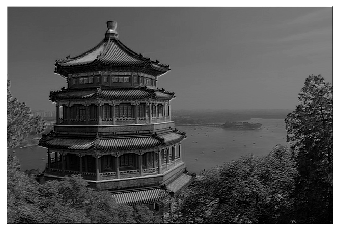

In [9]:
# Create 2 filters
conv_layer = tf.keras.layers.Conv2D(filters=2, kernel_size=(3,3), activation='relu', padding="same" )
new_images = conv_layer(images[0:1])
plot_image(new_images[0,:,:,0])

The CNN itself found the best filters to be applied by training. In that case, the filters are linked to the shapes of the figure, not only the the naive vertical or horizontal tracks only.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Cropping the Images

In [10]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)

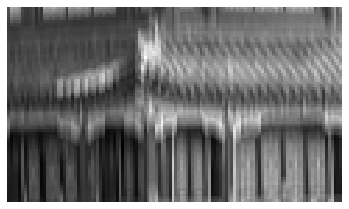

In [11]:
plot_image(crop(outputs[0, :, :, 0]))
plt.show()

## Task 2: Max Pooling Layer in Keras

Pooling layers are used to shrink the input image in order to reduce the computational load, the memory usage, and the number of parameters. 

**Task 2 a)** 
- Crop each image in `images` using `crop(...)`
- Create a max pool layer of pool_size=2 (https://keras.io/api/layers/pooling_layers/max_pooling2d/)
- apply the max pool layer to the `cropped_images` assigning the result to the variable `output`


↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [12]:
max_pool_layer = tf.keras.layers.MaxPooling2D(pool_size=2)

In [13]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)

In [14]:
output = max_pool_layer(cropped_images)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

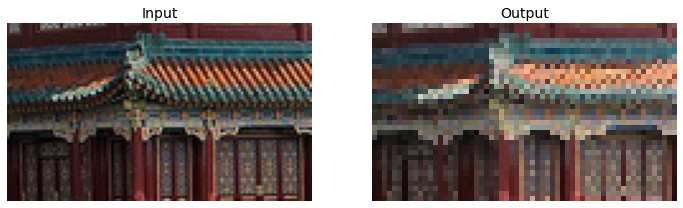

In [15]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

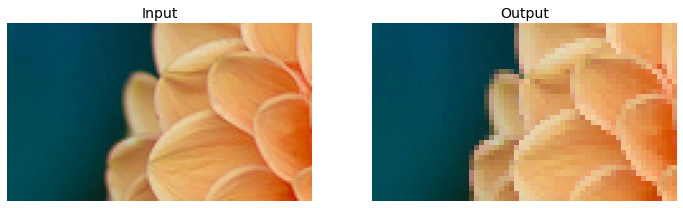

In [16]:

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[1])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[1])
ax2.axis("off")
plt.show()

**Task 2 b)**

Describe the effect of the max pooling layer. What are its benefits for a Neural Network?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 2b) answer The max pooling is a operation that calculates largest value in each patch of each feature map. The benefits of max pooling layer is to reduce the computacional load, memory usage and the number of parameters of the CNN model.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Tackling Fashion MNIST With a CNN

In [17]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# normalization
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4431872/4422102 [==============================] - 0s 0us/step


In [18]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

### Visualization of Model Structure
This is not necessary, but maybe interesting.

In [19]:
pip install visualkeras

     |████████████████████████████████| 992 kB 4.5 MB/s 


In [20]:
import visualkeras

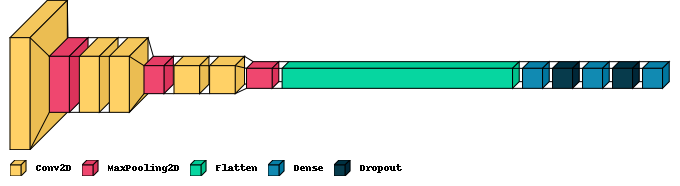

In [21]:
visualkeras.layered_view(model, legend=True)

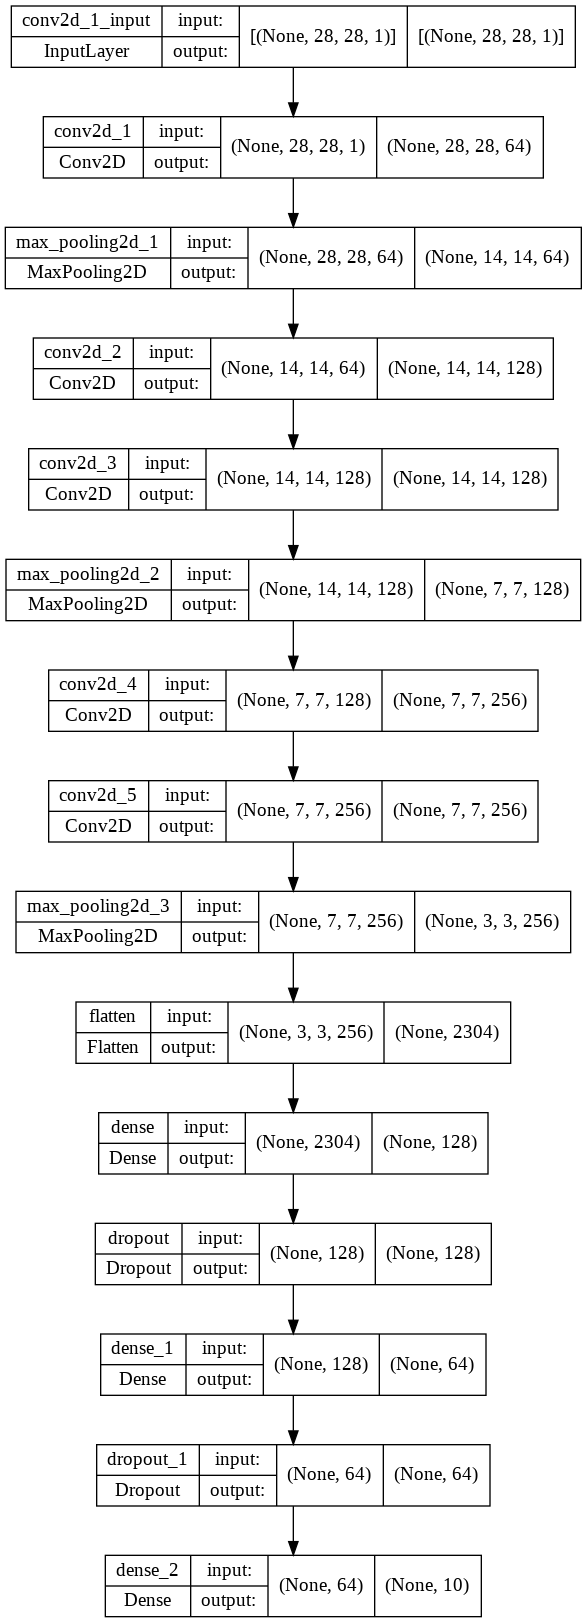

In [22]:
keras.utils.plot_model(model, show_shapes=True)   # does not need visual keras

## Task 3: 
- Compile the model using `"sparse_categorical_crossentropy"` as `loss`, `"nadam"` as optimizer and `["accuracy"]` for `metrics`
- fit the model for 10 epochs using `[X_valid, y_vald]` as validation data
- `evaluate` the model on `X_test, y_test`
- predict the first 10 instances of `X_test` and compare them to `y_test`

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 58s 31ms/step - loss: 0.7255 - accuracy: 0.7479 - val_loss: 0.3940 - val_accuracy: 0.8638
Epoch 2/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4231 - accuracy: 0.8575 - val_loss: 0.3375 - val_accuracy: 0.8786
Epoch 3/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3688 - accuracy: 0.8756 - val_loss: 0.2962 - val_accuracy: 0.8904
Epoch 4/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3361 - accuracy: 0.8865 - val_loss: 0.2884 - val_accuracy: 0.8916
Epoch 5/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3105 - accuracy: 0.8945 - val_loss: 0.2990 - val_accuracy: 0.8928
Epoch 6/10
1719/1719 [==============================] - 42s 24ms/step - loss: 0.2919 - accuracy: 0.9019 - val_loss: 0.2947 - val_accuracy: 0.8992
Epoch 7/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.2835 - accuracy: 0.9035 - val_loss: 0.3263 -

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2914 - accuracy: 0.9026


[0.29136258363723755, 0.9025999903678894]

In [26]:
y_pred = model.predict(X_test[0:10])

In [27]:
print("pred  target")
for i in range(len(y_pred)):
    print(" ", np.argmax(y_pred[i]),"    ", y_test[i])

pred  target
  9      9
  2      2
  1      1
  1      1
  6      6
  1      1
  4      4
  6      6
  5      5
  7      7


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 4: ResNet-34

In [28]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [29]:
resnet = keras.models.Sequential()
resnet.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[28,28,1]))
resnet.add(keras.layers.BatchNormalization())
resnet.add(keras.layers.Activation("relu"))
resnet.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    resnet.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
resnet.add(keras.layers.GlobalAvgPool2D())
resnet.add(keras.layers.Flatten())
resnet.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
# keras.utils.plot_model(resnet)

In [31]:
resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 residual_unit (ResidualUnit  (None, 7, 7, 64)         74240     
 )                                                               
                                                      

**Task 4:**   
a) Compile the ResNet-34 model with ADAM optimizer and train 10 for epochs   
b) Compare the performance the results with the ones from Task 3.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [32]:
resnet.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
# next, fit the model to the training set
# evaluate the model on the test set

In [33]:
history = resnet.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 160s 87ms/step - loss: 0.5326 - accuracy: 0.8167 - val_loss: 0.3932 - val_accuracy: 0.8542
Epoch 2/10
1719/1719 [==============================] - 145s 84ms/step - loss: 0.3668 - accuracy: 0.8712 - val_loss: 0.4627 - val_accuracy: 0.8374
Epoch 3/10
1719/1719 [==============================] - 145s 84ms/step - loss: 0.3388 - accuracy: 0.8814 - val_loss: 0.4204 - val_accuracy: 0.8582
Epoch 4/10
1719/1719 [==============================] - 145s 84ms/step - loss: 0.2880 - accuracy: 0.8959 - val_loss: 0.3041 - val_accuracy: 0.8894
Epoch 5/10
1719/1719 [==============================] - 145s 84ms/step - loss: 0.2790 - accuracy: 0.9000 - val_loss: 0.2814 - val_accuracy: 0.8924
Epoch 6/10
1719/1719 [==============================] - 145s 84ms/step - loss: 0.2530 - accuracy: 0.9098 - val_loss: 0.2647 - val_accuracy: 0.9026
Epoch 7/10
1719/1719 [==============================] - 144s 84ms/step - loss: 0.2227 - accuracy: 0.9189 - val_loss: 0

In [34]:
resnet.evaluate(X_test,y_test)

313/313 [==============================] - 9s 28ms/step - loss: 0.2672 - accuracy: 0.9074


[0.26720118522644043, 0.9074000120162964]

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 5: Pretrained Models for Transfer Learning

In this section we use the [tf_flowers](https://www.tensorflow.org/datasets/catalog/tf_flowers) dataset.

We reuse a pretrained [Xception model](https://towardsdatascience.com/review-xception-with-depthwise-separable-convolution-better-than-inception-v3-image-dc967dd42568) to classify pictures of flowers. During the first train the weights of the pretrained layers are frozen, while for the second train are not frozen.

In [35]:
pip install tensorflow_datasets

In [36]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [37]:
info.splits

{'train': <tfds.core.SplitInfo num_examples=3670>}

In [38]:
class_names = info.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [39]:
n_classes = info.features["label"].num_classes

In [40]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

**Warning:** TFDS's split API has evolved since the book was published. The [new split API](https://www.tensorflow.org/datasets/splits) (called S3) is much simpler to use:

In [41]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

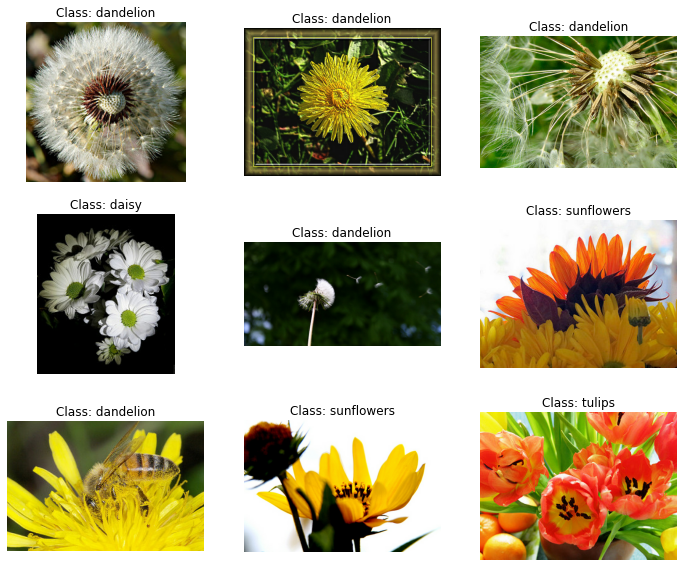

In [42]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [43]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

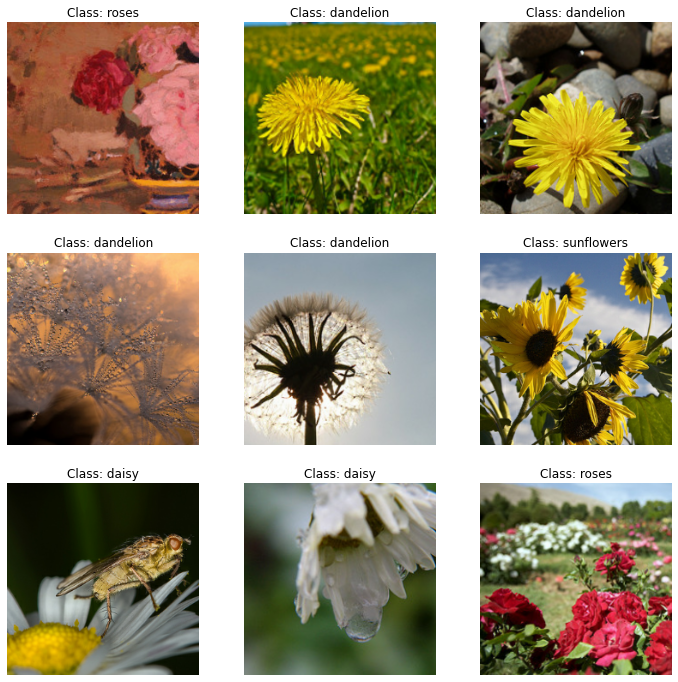

In [44]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [45]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg    = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model  = keras.models.Model(inputs=base_model.input, outputs=output)

83697664/83683744 [==============================] - 1s 0us/step


In [46]:
#keras.utils.plot_model(model)

In [47]:
# base_model not trainable

for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)
model.evaluate(test_set)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


86/86 [==============================] - 43s 393ms/step - loss: 1.0012 - accuracy: 0.8096 - val_loss: 1.0516 - val_accuracy: 0.8088
Epoch 2/5
86/86 [==============================] - 31s 364ms/step - loss: 0.3601 - accuracy: 0.9146 - val_loss: 0.6720 - val_accuracy: 0.8585
Epoch 3/5
86/86 [==============================] - 31s 365ms/step - loss: 0.2649 - accuracy: 0.9295 - val_loss: 0.6076 - val_accuracy: 0.8676
Epoch 4/5
86/86 [==============================] - 31s 364ms/step - loss: 0.2076 - accuracy: 0.9360 - val_loss: 0.6764 - val_accuracy: 0.8676
Epoch 5/5
12/12 [==============================] - 5s 376ms/step - loss: 0.5635 - accuracy: 0.8856


[0.5634881854057312, 0.8855586051940918]

In [48]:
# base_model trainable

for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)
model.evaluate(test_set)

Epoch 1/40
86/86 [==============================] - 119s 1s/step - loss: 0.3113 - accuracy: 0.8939 - val_loss: 0.7866 - val_accuracy: 0.8015
Epoch 2/40
86/86 [==============================] - 111s 1s/step - loss: 0.1235 - accuracy: 0.9593 - val_loss: 0.4714 - val_accuracy: 0.8603
Epoch 3/40
86/86 [==============================] - 111s 1s/step - loss: 0.0585 - accuracy: 0.9826 - val_loss: 0.3542 - val_accuracy: 0.9173
Epoch 4/40
86/86 [==============================] - 111s 1s/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.3161 - val_accuracy: 0.9154
Epoch 5/40
86/86 [==============================] - 111s 1s/step - loss: 0.0261 - accuracy: 0.9909 - val_loss: 0.3101 - val_accuracy: 0.9228
Epoch 6/40
86/86 [==============================] - 111s 1s/step - loss: 0.0159 - accuracy: 0.9956 - val_loss: 0.2741 - val_accuracy: 0.9338
Epoch 7/40
86/86 [==============================] - 111s 1s/step - loss: 0.0210 - accuracy: 0.9913 - val_loss: 0.3314 - val_accuracy: 0.9246
Epoch 8/40
86

[0.18313434720039368, 0.9564032554626465]

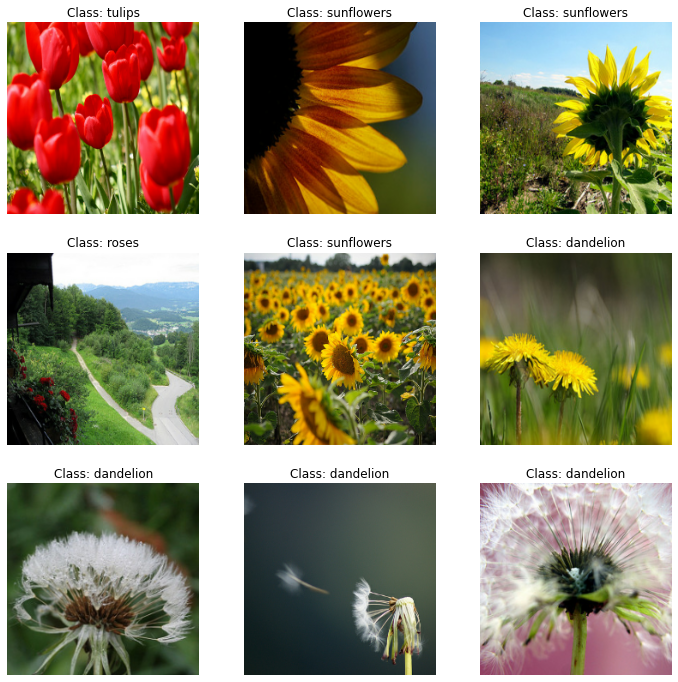

In [49]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

**Task 5:**
- Task 5a) Explain transfer learning and its benefits
- Task 5b) Compare the two trainings above (with/without base model trainable). What is the difference and which one performs better here?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 5a) answer: Transfer Learning is a machine learning method where it is reused a pre-trained model as the starting point for a model on a new task. As an example, if in training a classifier to predict whether an image contains food, you could use the knowledge it gained during training to recognize drinks. The main benefits of transfer learning include the saving of resources and improved efficiency when training new models. 

Task 5b) answer: The model that used transfer learning performed better than the one which trained from scratch. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Task 6: High Accuracy CNN for MNIST
Build your own CNN and try to achieve the highest possible accuracy on MNIST.
A basic structure is given below, play around with it.

The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set. This places this model roughly in the top 20% in the [MNIST Kaggle competition](https://www.kaggle.com/c/digit-recognizer/) (if we ignore the models with an accuracy greater than 99.79% which were most likely trained on the test set, as explained by Chris Deotte in [this post](https://www.kaggle.com/c/digit-recognizer/discussion/61480)). 

In order to reach an accuracy higher than 99.5% on the test set you might try:

a) batch normalization layers (https://keras.io/api/layers/normalization_layers/batch_normalization/)   
b) set a learning scheduler (Check Chapter 11)   
c) add image augmentation (Check Chapter 14)   
d) create an ensemble (Check Chapter 14)   
e) use hyperparameter tuning, e.g. with [keras tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner) (Hyperband seems to work quite well) 

As long as you implement at least **two** of the above you will get full points on this one. 

In [50]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.BatchNormalization())
  model.add(DefaultConv2D(128, kernel_size=7, strides=2,input_shape=[28,28,1]))
  model.add(keras.layers.BatchNormalization())
  model.add(DefaultConv2D(64, kernel_size=7, strides=2,input_shape=[28,28,1]))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(pool_size=2))
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the Dense layers
  # Choose an optimal value between 16-1024
  hp_units1 = hp.Int('units', min_value=16, max_value=1024, step=16)
  hp_units2 = hp.Int('units', min_value=16, max_value=1024, step=16)
  hp_units3 = hp.Int('units', min_value=16, max_value=1024, step=16)
  model.add(keras.layers.Dense(units=hp_units1, activation='relu'))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(units=10, activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    DefaultConv2D(128, kernel_size=7, strides=2,input_shape=[28,28,1]),
    keras.layers.BatchNormalization(),
    DefaultConv2D(64, kernel_size=7, strides=2,input_shape=[28,28,1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [51]:
!pip install -q -U keras-tuner
import keras_tuner as kt

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

     |████████████████████████████████| 133 kB 5.3 MB/s 


In [52]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [53]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callback_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)

In [54]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[callback_lr,callback_es])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 30 Complete [00h 04m 23s]
val_accuracy: 0.8939999938011169

Best val_accuracy So Far: 0.8939999938011169
Total elapsed time: 00h 54m 36s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [55]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[callback_lr,callback_es])

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 37s 20ms/step - loss: 0.6193 - accuracy: 0.7870 - val_loss: 0.4272 - val_accuracy: 0.8368 - lr: 0.0010
Epoch 2/50
1719/1719 [==============================] - 25s 15ms/step - loss: 0.4343 - accuracy: 0.8446 - val_loss: 0.3971 - val_accuracy: 0.8496 - lr: 0.0010
Epoch 3/50
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3887 - accuracy: 0.8585 - val_loss: 0.3548 - val_accuracy: 0.8736 - lr: 0.0010
Epoch 4/50
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3552 - accuracy: 0.8724 - val_loss: 0.3313 - val_accuracy: 0.8760 - lr: 0.0010
Epoch 5/50
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3274 - accuracy: 0.8813 - val_loss: 0.3215 - val_accuracy: 0.8848 - lr: 0.0010
Epoch 6/50
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3157 - accuracy: 0.8838 - val_loss: 0.3201 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 7/50
1719/1719 [==============================] - 2

In [56]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_data=(X_valid, y_valid))

Epoch 1/9


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 24s 13ms/step - loss: 0.6200 - accuracy: 0.7875 - val_loss: 0.4174 - val_accuracy: 0.8452
Epoch 2/9
1719/1719 [==============================] - 22s 13ms/step - loss: 0.4371 - accuracy: 0.8443 - val_loss: 0.3947 - val_accuracy: 0.8514
Epoch 3/9
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3943 - accuracy: 0.8592 - val_loss: 0.3495 - val_accuracy: 0.8740
Epoch 4/9
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3544 - accuracy: 0.8731 - val_loss: 0.3483 - val_accuracy: 0.8722
Epoch 5/9
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3294 - accuracy: 0.8810 - val_loss: 0.3194 - val_accuracy: 0.8818
Epoch 6/9
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3084 - accuracy: 0.8886 - val_loss: 0.3182 - val_accuracy: 0.8818
Epoch 7/9
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2888 - accuracy: 0.8959 - val_loss: 0.3112 - val_accuracy: 0.

In [57]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 2s 6ms/step - loss: 0.3243 - accuracy: 0.8835
[test loss, test accuracy]: [0.32431894540786743, 0.8834999799728394]
